In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\pundr\Downloads\AQI.csv")

# Clean data
df['last_update'] = pd.to_datetime(df['last_update'])  # Convert to datetime
df.drop_duplicates(inplace=True)  # Remove duplicates
df = df.dropna(subset=['pollutant_avg'])  # Drop rows with missing pollutant_avg

In [2]:
#EDA
print(df.describe())

# Checking number missing values
print(df.isnull().sum())

# Unique pollutants
print(df['pollutant_id'].unique())

               last_update     latitude    longitude  pollutant_min  \
count                 2962  2962.000000  2962.000000    2962.000000   
mean   2025-08-04 11:00:00    22.359501    78.643742      23.567522   
min    2025-08-04 11:00:00     8.514909    70.909168       1.000000   
25%    2025-08-04 11:00:00    19.060498    75.386760       5.000000   
50%    2025-08-04 11:00:00    23.108440    77.381568      14.000000   
75%    2025-08-04 11:00:00    26.833997    80.723178      33.000000   
max    2025-08-04 11:00:00    34.066206    94.636574     168.000000   
std                    NaN     5.523387     4.893803      26.099885   

       pollutant_max  pollutant_avg  
count     2962.00000    2962.000000  
mean        84.30655      45.134706  
min          1.00000       1.000000  
25%         20.00000      12.000000  
50%         57.00000      29.000000  
75%        113.00000      61.000000  
max        500.00000     347.000000  
std         88.81164      48.159700  
country          0

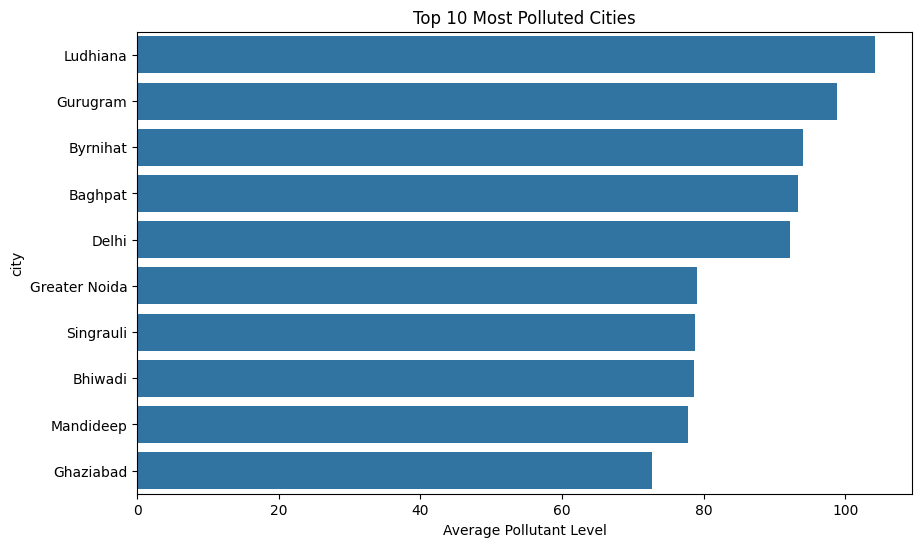

In [3]:
# Top 10 cities by average pollution
top_cities = df.groupby('city')['pollutant_avg'].mean().nlargest(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Most Polluted Cities')
plt.xlabel('Average Pollutant Level')
plt.show()

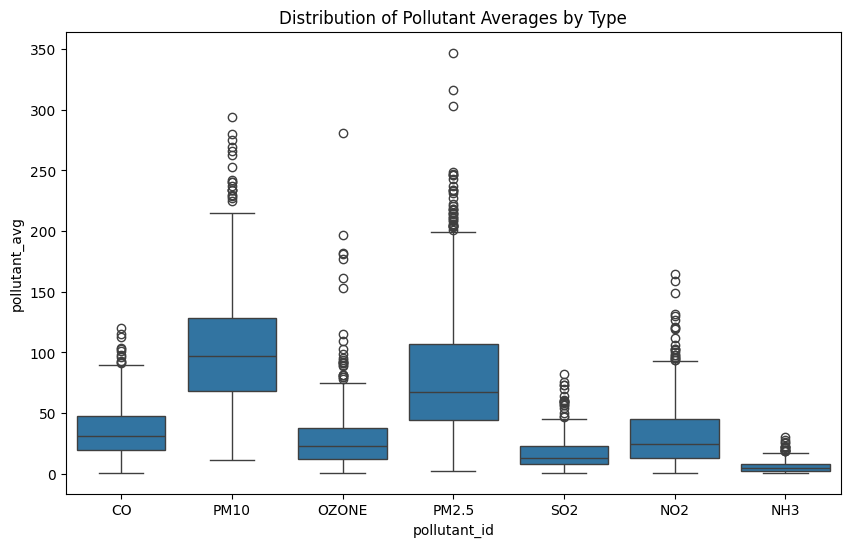

In [13]:
# Boxplot by pollutant_id
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pollutant_id', y='pollutant_avg')
plt.title('Distribution of Pollutant Averages by Type')
plt.show()

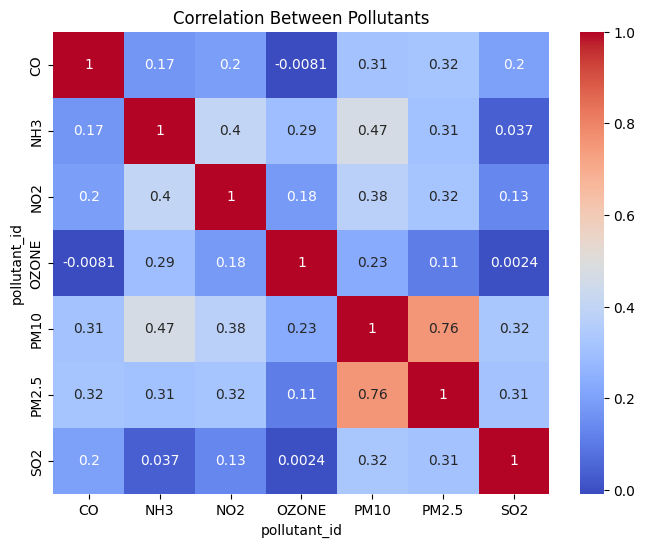

In [6]:
# Pivot to compare pollutants
pivot_df = df.pivot_table(index=['city', 'last_update'], columns='pollutant_id', values='pollutant_avg')

# Correlation matrix
corr = pivot_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()

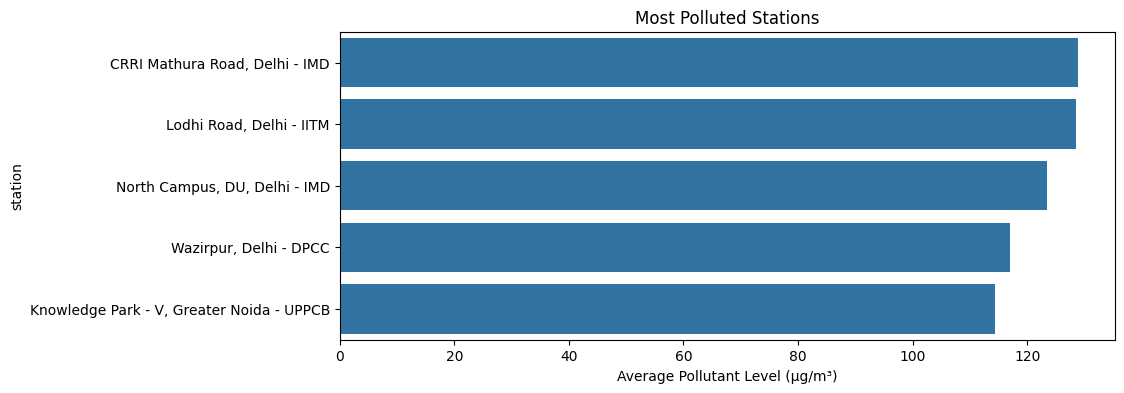

In [12]:
# Top 5 worst stations
worst_stations = df.groupby('station')['pollutant_avg'].mean().nlargest(5)

plt.figure(figsize=(10, 4))
sns.barplot(x=worst_stations.values, y=worst_stations.index)
plt.title('Most Polluted Stations')
plt.xlabel('Average Pollutant Level (µg/m³)')
plt.show()

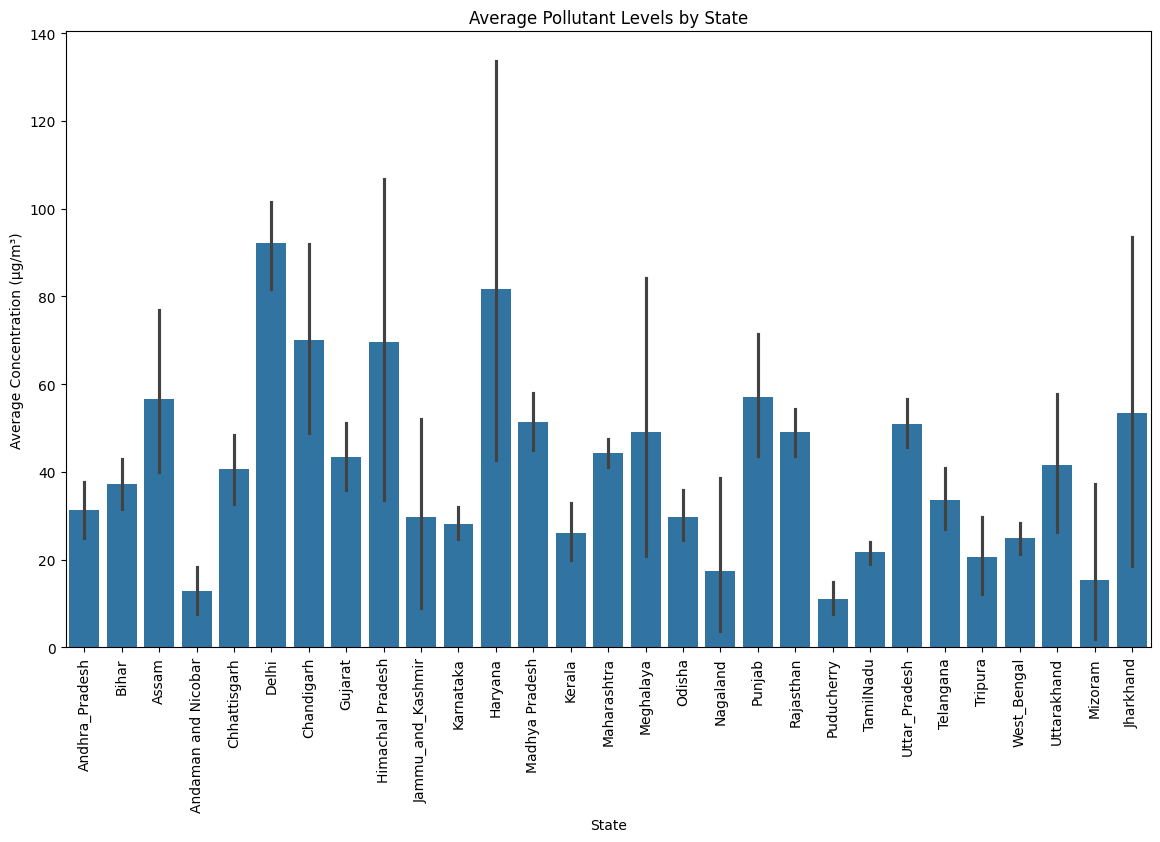

In [29]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df,x="state",y="pollutant_avg")
plt.title('Average Pollutant Levels by State')
plt.xlabel('State')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=90)
plt.show()